In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2024-03-22 / Aki Taanila


# Kynttiläkaavioita ja liukuvia keskiarvoja

Seuraavassa käytetään datan noutoon **yfinance**-kirjastoa, jonka Minicondan ja Anacondan käyttöjät voivat asentaa komentoriviltä komennolla `conda  install -c conda-forge yfinance`

Seuraavassa käytetään **mplfinance**-kirjastoa, jonka Minicondan ja Anacodan käyttäjät voivat asentaa komentoriviltä komennolla
`conda install -c conda-forge mplfinance`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf

## Datan nouto

Kurssihistorioita voit noutaa Yahoo Finance -palvelusta. Voit googlata muiden osakkeiden nimiä. Esimerkiksi halulla 'yahoo finance kemira' löydät Kemiran tunnuksen Yahoossa.

In [3]:
elisa = yf.download('ELISA.HE', start='2022-1-1')
elisa

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,54.200001,54.779999,54.200001,54.459999,50.458866,159243
2022-01-04,54.500000,55.279999,54.220001,54.900002,50.866543,304690
2022-01-05,54.799999,55.200001,54.419998,54.419998,50.421799,292389
2022-01-07,54.400002,54.599998,53.540001,53.639999,49.699112,401992
2022-01-10,53.639999,53.639999,52.160000,52.860001,48.976418,359226
...,...,...,...,...,...,...
2024-03-18,42.099998,42.270000,41.840000,42.220001,42.220001,245387
2024-03-19,42.220001,42.360001,42.009998,42.250000,42.250000,187567
2024-03-20,42.349998,42.630001,42.189999,42.549999,42.549999,187276


**Tärkeää**: Seuraavassa oletetaan, että datasta löytyy yllä näkyvällä tavalla nimetyt muuttujat (sarakkeet): High, Low, Open, Close, Volume.

## Kynttiläkaavio

Parametri `show_nontrading=True` näyttää tyhjän välin viikonloppujen kohdalla.

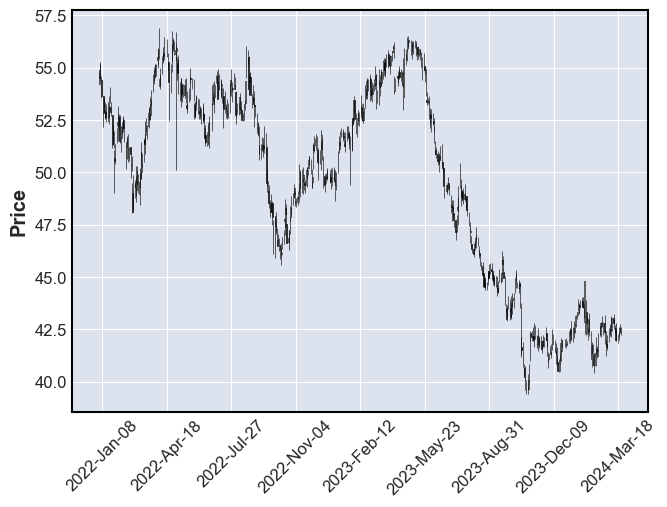

In [4]:
mpf.plot(elisa['2022-1':], type='candle', show_nontrading=True)

## Vaihdon määrä

Parametri **volume=True** lisää kaavioon vaihdon määrän (Volume).

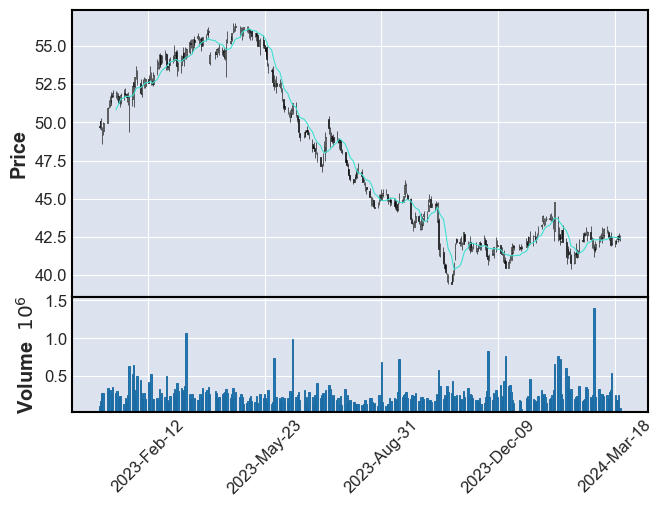

In [5]:
mpf.plot(elisa['2023-1':], type='candle', mav=(10), volume=True, show_nontrading=True)

## Liukuvia keskiarvoja

Parametri **mav=(50, 150)** piirtää 50 päivän ja 150 päivän liukuvat keskiarvot. 

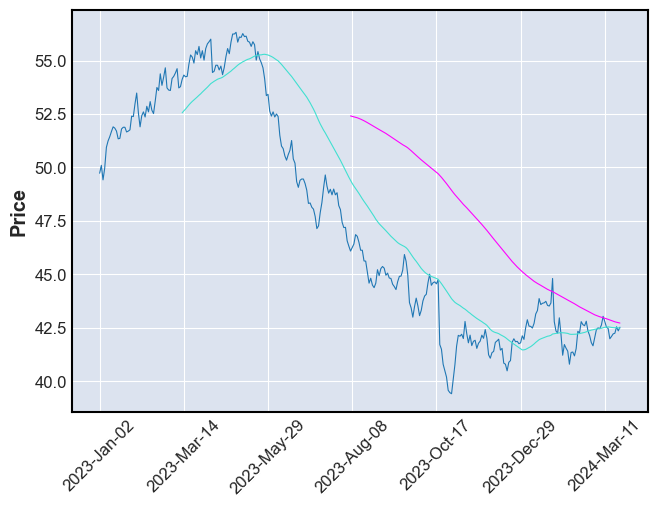

In [6]:
mpf.plot(elisa['2023':], type='line', mav=(50, 150))

## Lisätietoa

https://github.com/matplotlib/mplfinance